### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
!pip install tensorflow
!pip install sklearn
import tensorflow as tf

In [2]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv(r"C:\Users\DLH\Documents\Module 19\charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

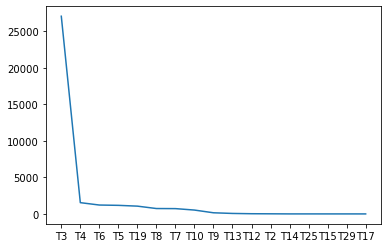

In [6]:
# Visualize the value counts of APPLICATION_TYPE
import matplotlib.pyplot as plt
plt.plot(application_df["APPLICATION_TYPE"].value_counts())

In [7]:
# Determine which values to replace if counts are less than ...?

replace_application = application_df["APPLICATION_TYPE"].value_counts() > 10

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1570        1
C1580        1
C2561        1
C1245        1
C2380        1
Name: CLASSIFICATION, Length: 71, dtype: int64

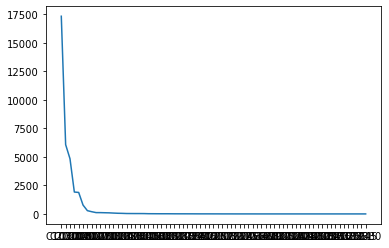

In [9]:
# Visualize the value counts of CLASSIFICATION
plt.plot(application_df["CLASSIFICATION"].value_counts())
#  YOUR CODE GOES HERE

In [10]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = application_df["CLASSIFICATION"].value_counts() > 10

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1570        1
C1580        1
C2561        1
C1245        1
C2380        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [11]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
num_cols = application_df._get_numeric_data().columns
application_cat = list(set(application_df.columns)-set(num_cols))
print(application_cat)

['ORGANIZATION', 'SPECIAL_CONSIDERATIONS', 'CLASSIFICATION', 'USE_CASE', 'APPLICATION_TYPE', 'INCOME_AMT', 'AFFILIATION']


In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,CLASSIFICATION_C0,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1230,...,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,1)

In [34]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = application_df.drop(["IS_SUCCESSFUL"],axis=1)
y = application_df["IS_SUCCESSFUL"]

### L1-based feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X,y)
select_model = SelectFromModel(lsvc, prefit=True)
#X = select_model.transform(X)
print(X.shape)

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

(34299, 116)


C:\Users\DLH\anaconda4\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [35]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'ORGANIZATION_Association',
       'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation',
       'ORGANIZATION_Trust', 'SPECIAL_CONSIDERATIONS_N',
       'SPECIAL_CONSIDERATIONS_Y', 'CLASSIFICATION_C0',
       ...
       'INCOME_AMT_1M-5M', 'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+',
       'INCOME_AMT_5M-10M', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional'],
      dtype='object', length=117)

### Deliverable 3: Compile, Train and Evaluate the Model

In [37]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=50,activation="relu",input_dim=X.shape[1]))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=10,activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=5,activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 50)                5850      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 6,421
Trainable params: 6,421
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"


# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

Epoch 1/500
858/858 [==============================] - 1s 778us/step - loss: 0.5234 - accuracy: 0.7457
Epoch 2/500
138/858 [===>..........................] - ETA: 0s - loss: 0.5092 - accuracy: 0.7637
Epoch 00002: saving model to checkpoints\weights.02.hdf5
858/858 [==============================] - 1s 792us/step - loss: 0.5201 - accuracy: 0.7506
Epoch 3/500
263/858 [========>.....................] - ETA: 0s - loss: 0.5164 - accuracy: 0.7498
Epoch 00003: saving model to checkpoints\weights.03.hdf5
858/858 [==============================] - 1s 775us/step - loss: 0.5201 - accuracy: 0.7485
Epoch 4/500
389/858 [============>.................] - ETA: 0s - loss: 0.5259 - accuracy: 0.7436
Epoch 00004: saving model to checkpoints\weights.04.hdf5
858/858 [==============================] - 1s 787us/step - loss: 0.5254 - accuracy: 0.7440
Epoch 5/500
541/858 [=================>............] - ETA: 0s - loss: 0.5145 - accuracy: 0.7508
Epoch 00005: saving model to checkpoints\weights.05.hdf5
858/858 

858/858 [==============================] - 1s 946us/step - loss: 0.5238 - accuracy: 0.7435
Epoch 38/500
240/858 [=======>......................] - ETA: 0s - loss: 0.5231 - accuracy: 0.7457
Epoch 00038: saving model to checkpoints\weights.38.hdf5
858/858 [==============================] - 1s 812us/step - loss: 0.5237 - accuracy: 0.7450
Epoch 39/500
395/858 [============>.................] - ETA: 0s - loss: 0.5247 - accuracy: 0.7419
Epoch 00039: saving model to checkpoints\weights.39.hdf5
858/858 [==============================] - 1s 772us/step - loss: 0.5249 - accuracy: 0.7430
Epoch 40/500
533/858 [=================>............] - ETA: 0s - loss: 0.5214 - accuracy: 0.7455
Epoch 00040: saving model to checkpoints\weights.40.hdf5
858/858 [==============================] - 1s 771us/step - loss: 0.5221 - accuracy: 0.7458
Epoch 41/500
680/858 [======================>.......] - ETA: 0s - loss: 0.5241 - accuracy: 0.7449
Epoch 00041: saving model to checkpoints\weights.41.hdf5
858/858 [=======

858/858 [==============================] - 1s 797us/step - loss: 0.5190 - accuracy: 0.7487
Epoch 74/500
326/858 [==========>...................] - ETA: 0s - loss: 0.5281 - accuracy: 0.7447
Epoch 00074: saving model to checkpoints\weights.74.hdf5
858/858 [==============================] - 1s 785us/step - loss: 0.5246 - accuracy: 0.7461
Epoch 75/500
473/858 [===============>..............] - ETA: 0s - loss: 0.5254 - accuracy: 0.7416
Epoch 00075: saving model to checkpoints\weights.75.hdf5
858/858 [==============================] - 1s 765us/step - loss: 0.5250 - accuracy: 0.7428
Epoch 76/500
597/858 [===================>..........] - ETA: 0s - loss: 0.5169 - accuracy: 0.7485
Epoch 00076: saving model to checkpoints\weights.76.hdf5
858/858 [==============================] - 1s 777us/step - loss: 0.5191 - accuracy: 0.7477
Epoch 77/500
736/858 [========================>.....] - ETA: 0s - loss: 0.5212 - accuracy: 0.7458
Epoch 00077: saving model to checkpoints\weights.77.hdf5
858/858 [=======

858/858 [==============================] - 1s 777us/step - loss: 0.5253 - accuracy: 0.7442
Epoch 110/500
474/858 [===============>..............] - ETA: 0s - loss: 0.5126 - accuracy: 0.7549
Epoch 00110: saving model to checkpoints\weights.110.hdf5
858/858 [==============================] - 1s 759us/step - loss: 0.5160 - accuracy: 0.7520
Epoch 111/500
618/858 [====================>.........] - ETA: 0s - loss: 0.5229 - accuracy: 0.7427
Epoch 00111: saving model to checkpoints\weights.111.hdf5
858/858 [==============================] - 1s 764us/step - loss: 0.5231 - accuracy: 0.7437
Epoch 112/500
739/858 [========================>.....] - ETA: 0s - loss: 0.5281 - accuracy: 0.7407
Epoch 00112: saving model to checkpoints\weights.112.hdf5
858/858 [==============================] - 1s 763us/step - loss: 0.5274 - accuracy: 0.7414
Epoch 113/500
858/858 [==============================] - 1s 757us/step - loss: 0.5233 - accuracy: 0.7451
Epoch 114/500
  1/858 [..............................] - ETA

Epoch 00145: saving model to checkpoints\weights.145.hdf5
858/858 [==============================] - 1s 765us/step - loss: 0.5183 - accuracy: 0.7494
Epoch 146/500
551/858 [==================>...........] - ETA: 0s - loss: 0.5254 - accuracy: 0.7447
Epoch 00146: saving model to checkpoints\weights.146.hdf5
858/858 [==============================] - 1s 776us/step - loss: 0.5248 - accuracy: 0.7452
Epoch 147/500
717/858 [========================>.....] - ETA: 0s - loss: 0.5217 - accuracy: 0.7473
Epoch 00147: saving model to checkpoints\weights.147.hdf5
858/858 [==============================] - 1s 790us/step - loss: 0.5217 - accuracy: 0.7472
Epoch 148/500
858/858 [==============================] - 1s 747us/step - loss: 0.5221 - accuracy: 0.7470
Epoch 149/500
  1/858 [..............................] - ETA: 1s - loss: 0.5133 - accuracy: 0.7500
Epoch 00149: saving model to checkpoints\weights.149.hdf5
858/858 [==============================] - 1s 755us/step - loss: 0.5220 - accuracy: 0.7472
Ep

517/858 [=================>............] - ETA: 0s - loss: 0.5178 - accuracy: 0.7481
Epoch 00181: saving model to checkpoints\weights.181.hdf5
858/858 [==============================] - 1s 795us/step - loss: 0.5202 - accuracy: 0.7470
Epoch 182/500
663/858 [======================>.......] - ETA: 0s - loss: 0.5190 - accuracy: 0.7491
Epoch 00182: saving model to checkpoints\weights.182.hdf5
858/858 [==============================] - 1s 789us/step - loss: 0.5200 - accuracy: 0.7483
Epoch 183/500
796/858 [==========================>...] - ETA: 0s - loss: 0.5208 - accuracy: 0.7469
Epoch 00183: saving model to checkpoints\weights.183.hdf5
858/858 [==============================] - 1s 781us/step - loss: 0.5210 - accuracy: 0.7468
Epoch 184/500
858/858 [==============================] - 1s 757us/step - loss: 0.5235 - accuracy: 0.7445
Epoch 185/500
 67/858 [=>............................] - ETA: 0s - loss: 0.5351 - accuracy: 0.7358
Epoch 00185: saving model to checkpoints\weights.185.hdf5
858/858 

Epoch 217/500
622/858 [====================>.........] - ETA: 0s - loss: 0.5230 - accuracy: 0.7421
Epoch 00217: saving model to checkpoints\weights.217.hdf5
858/858 [==============================] - 1s 666us/step - loss: 0.5229 - accuracy: 0.7432
Epoch 218/500
769/858 [=========================>....] - ETA: 0s - loss: 0.5222 - accuracy: 0.7460
Epoch 00218: saving model to checkpoints\weights.218.hdf5
858/858 [==============================] - 1s 677us/step - loss: 0.5223 - accuracy: 0.7458
Epoch 219/500
858/858 [==============================] - 1s 674us/step - loss: 0.5222 - accuracy: 0.7475
Epoch 220/500
 74/858 [=>............................] - ETA: 0s - loss: 0.5302 - accuracy: 0.7399
Epoch 00220: saving model to checkpoints\weights.220.hdf5
858/858 [==============================] - 1s 683us/step - loss: 0.5241 - accuracy: 0.7437
Epoch 221/500
226/858 [======>.......................] - ETA: 0s - loss: 0.5216 - accuracy: 0.7460
Epoch 00221: saving model to checkpoints\weights.221

858/858 [==============================] - 1s 764us/step - loss: 0.5239 - accuracy: 0.7440
Epoch 253/500
775/858 [==========================>...] - ETA: 0s - loss: 0.5223 - accuracy: 0.7475
Epoch 00253: saving model to checkpoints\weights.253.hdf5
858/858 [==============================] - 1s 673us/step - loss: 0.5223 - accuracy: 0.7474
Epoch 254/500
858/858 [==============================] - 1s 661us/step - loss: 0.5207 - accuracy: 0.7494
Epoch 255/500
  1/858 [..............................] - ETA: 0s - loss: 0.4366 - accuracy: 0.7812
Epoch 00255: saving model to checkpoints\weights.255.hdf5
858/858 [==============================] - 1s 688us/step - loss: 0.5257 - accuracy: 0.7432
Epoch 256/500
152/858 [====>.........................] - ETA: 0s - loss: 0.5268 - accuracy: 0.7392
Epoch 00256: saving model to checkpoints\weights.256.hdf5
858/858 [==============================] - 1s 684us/step - loss: 0.5248 - accuracy: 0.7426
Epoch 257/500
303/858 [=========>....................] - ETA

858/858 [==============================] - 1s 699us/step - loss: 0.5213 - accuracy: 0.7514
Epoch 289/500
858/858 [==============================] - 1s 682us/step - loss: 0.5240 - accuracy: 0.7454
Epoch 290/500
  1/858 [..............................] - ETA: 0s - loss: 0.4740 - accuracy: 0.8125
Epoch 00290: saving model to checkpoints\weights.290.hdf5
858/858 [==============================] - 1s 685us/step - loss: 0.5209 - accuracy: 0.74660s - loss: 0.522
Epoch 291/500
145/858 [====>.........................] - ETA: 0s - loss: 0.5125 - accuracy: 0.7568
Epoch 00291: saving model to checkpoints\weights.291.hdf5
858/858 [==============================] - 1s 692us/step - loss: 0.5200 - accuracy: 0.7488
Epoch 292/500
301/858 [=========>....................] - ETA: 0s - loss: 0.5154 - accuracy: 0.7531
Epoch 00292: saving model to checkpoints\weights.292.hdf5
858/858 [==============================] - 1s 691us/step - loss: 0.5193 - accuracy: 0.7491
Epoch 293/500
461/858 [===============>.....

  1/858 [..............................] - ETA: 0s - loss: 0.6773 - accuracy: 0.6562
Epoch 00325: saving model to checkpoints\weights.325.hdf5
858/858 [==============================] - 1s 685us/step - loss: 0.5242 - accuracy: 0.7435
Epoch 326/500
 74/858 [=>............................] - ETA: 0s - loss: 0.5050 - accuracy: 0.7650
Epoch 00326: saving model to checkpoints\weights.326.hdf5
858/858 [==============================] - 1s 675us/step - loss: 0.5207 - accuracy: 0.7480
Epoch 327/500
229/858 [=======>......................] - ETA: 0s - loss: 0.5242 - accuracy: 0.7385
Epoch 00327: saving model to checkpoints\weights.327.hdf5
858/858 [==============================] - 1s 675us/step - loss: 0.5209 - accuracy: 0.7454
Epoch 328/500
377/858 [============>.................] - ETA: 0s - loss: 0.5339 - accuracy: 0.7341
Epoch 00328: saving model to checkpoints\weights.328.hdf5
858/858 [==============================] - 1s 692us/step - loss: 0.5284 - accuracy: 0.7401
Epoch 329/500
543/858 

Epoch 361/500
 77/858 [=>............................] - ETA: 0s - loss: 0.5197 - accuracy: 0.7436
Epoch 00361: saving model to checkpoints\weights.361.hdf5
858/858 [==============================] - 1s 676us/step - loss: 0.5224 - accuracy: 0.7447
Epoch 362/500
223/858 [======>.......................] - ETA: 0s - loss: 0.5010 - accuracy: 0.7622
Epoch 00362: saving model to checkpoints\weights.362.hdf5
858/858 [==============================] - 1s 686us/step - loss: 0.5141 - accuracy: 0.7529
Epoch 363/500
385/858 [============>.................] - ETA: 0s - loss: 0.5256 - accuracy: 0.7397
Epoch 00363: saving model to checkpoints\weights.363.hdf5
858/858 [==============================] - 1s 685us/step - loss: 0.5247 - accuracy: 0.7417
Epoch 364/500
526/858 [=================>............] - ETA: 0s - loss: 0.5158 - accuracy: 0.7479
Epoch 00364: saving model to checkpoints\weights.364.hdf5
858/858 [==============================] - 1s 691us/step - loss: 0.5178 - accuracy: 0.7475
Epoch 36

858/858 [==============================] - 1s 693us/step - loss: 0.5220 - accuracy: 0.7453
Epoch 397/500
157/858 [====>.........................] - ETA: 0s - loss: 0.5248 - accuracy: 0.7418
Epoch 00397: saving model to checkpoints\weights.397.hdf5
858/858 [==============================] - 1s 682us/step - loss: 0.5221 - accuracy: 0.7464
Epoch 398/500
296/858 [=========>....................] - ETA: 0s - loss: 0.5166 - accuracy: 0.7531
Epoch 00398: saving model to checkpoints\weights.398.hdf5
858/858 [==============================] - 1s 682us/step - loss: 0.5215 - accuracy: 0.7474
Epoch 399/500
462/858 [===============>..............] - ETA: 0s - loss: 0.5125 - accuracy: 0.7545
Epoch 00399: saving model to checkpoints\weights.399.hdf5
858/858 [==============================] - 1s 690us/step - loss: 0.5169 - accuracy: 0.7509
Epoch 400/500
616/858 [====================>.........] - ETA: 0s - loss: 0.5258 - accuracy: 0.7436
Epoch 00400: saving model to checkpoints\weights.400.hdf5
858/858 

858/858 [==============================] - 1s 703us/step - loss: 0.5232 - accuracy: 0.7477
Epoch 433/500
306/858 [=========>....................] - ETA: 0s - loss: 0.5301 - accuracy: 0.7398
Epoch 00433: saving model to checkpoints\weights.433.hdf5
858/858 [==============================] - 1s 692us/step - loss: 0.5252 - accuracy: 0.7439
Epoch 434/500
452/858 [==============>...............] - ETA: 0s - loss: 0.5303 - accuracy: 0.7402
Epoch 00434: saving model to checkpoints\weights.434.hdf5
858/858 [==============================] - 1s 683us/step - loss: 0.5271 - accuracy: 0.7424
Epoch 435/500
605/858 [====================>.........] - ETA: 0s - loss: 0.5181 - accuracy: 0.7509
Epoch 00435: saving model to checkpoints\weights.435.hdf5
858/858 [==============================] - 1s 686us/step - loss: 0.5192 - accuracy: 0.7498
Epoch 436/500
769/858 [=========================>....] - ETA: 0s - loss: 0.5232 - accuracy: 0.7436
Epoch 00436: saving model to checkpoints\weights.436.hdf5
858/858 

858/858 [==============================] - 1s 686us/step - loss: 0.5233 - accuracy: 0.7451
Epoch 469/500
381/858 [============>.................] - ETA: 0s - loss: 0.5291 - accuracy: 0.7399
Epoch 00469: saving model to checkpoints\weights.469.hdf5
858/858 [==============================] - 1s 688us/step - loss: 0.5254 - accuracy: 0.7434
Epoch 470/500
539/858 [=================>............] - ETA: 0s - loss: 0.5170 - accuracy: 0.7476
Epoch 00470: saving model to checkpoints\weights.470.hdf5
858/858 [==============================] - 1s 680us/step - loss: 0.5191 - accuracy: 0.7468
Epoch 471/500
681/858 [======================>.......] - ETA: 0s - loss: 0.5193 - accuracy: 0.7459
Epoch 00471: saving model to checkpoints\weights.471.hdf5
858/858 [==============================] - 1s 688us/step - loss: 0.5199 - accuracy: 0.7460
Epoch 472/500
858/858 [==============================] - 1s 670us/step - loss: 0.5189 - accuracy: 0.7499
Epoch 473/500
  1/858 [..............................] - ETA

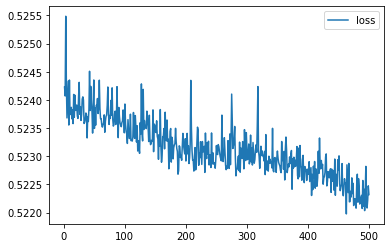

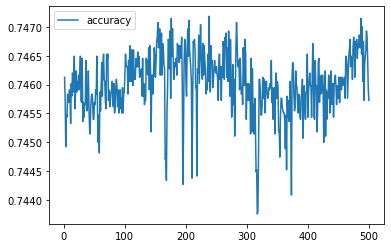

In [42]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, Y_train, epochs=500,callbacks=[cp_callback])
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")
# Plot the accuracy
history_df.plot(y="accuracy")

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,Y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5784 - accuracy: 0.7214
Loss: 0.5784465670585632, Accuracy: 0.7214285731315613


In [ ]:
nn.save("optimized_model.h5")